In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string as st
import tensorflow as tf
import keras
import seaborn as sns
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = pd.read_csv('data/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
data.shape

(50000, 2)

In [7]:
data.review.nunique()

49582

In [8]:
X = data.iloc[:,0]
y = data.iloc[:,1]

In [9]:
X.iloc[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [10]:
def repair(text):
    tags = re.compile('<.*?>')            #remove html tags
    text = tags.sub(r'',text)
    
    urls = re.compile(r'https?://\S+|www\.\S+') #remove urls
    text = urls.sub(r'',text)
    
    punc_list = st.punctuation
    repaired_text = text.translate(str.maketrans('','',punc_list)) #remove punctuations
    
    return repaired_text

In [11]:
X = X.apply(repair)

In [12]:
X[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy The plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to loveThis was the most Id laughed at one of Woodys comedies in years dare I say a decade While Ive never been impressed with Scarlet Johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanThis may not be the crown jewel of his career but it was wittier than Devil Wears Prada and more interesting than Superman a great comedy to go see with friends'

In [13]:
X = X.str.lower()

In [14]:
X[2]

'i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends'

In [15]:
def stopwords_removal(text):
    stops = stopwords.words('english')
    stop_text = " ".join([word if word not in stops else '' for word in text.split()])
    stop_text = " ".join(stop_text.split())
    return stop_text

In [16]:
stopwords_removal('i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends')

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown lovethis id laughed one woodys comedies years dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wears prada interesting superman great comedy go see friends'

In [17]:
X = X.apply(stopwords_removal)

In [18]:
def stemming(text):
    stemmer = PorterStemmer()
    stem_text = " ".join([stemmer.stem(word) for word in text.split()])
    return stem_text

In [19]:
stemming('thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown lovethis id laughed one woodys comedies years dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wears prada interesting superman great comedy go see friends')

'thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point 2 risk addict thought proof woodi allen still fulli control style mani us grown lovethi id laugh one woodi comedi year dare say decad ive never impress scarlet johanson manag tone sexi imag jump right averag spirit young womanthi may crown jewel career wittier devil wear prada interest superman great comedi go see friend'

In [20]:
X = X.apply(stemming)

In [21]:
X[0]

'one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom c

In [22]:
binarizer = LabelBinarizer()
y = binarizer.fit_transform(y)

In [23]:
y.shape

(50000, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train.shape

(40000,)

In [26]:
y_train.shape

(40000, 1)

In [27]:
tfidf = TfidfVectorizer(ngram_range=(1,3))

In [28]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [29]:
X_train.shape

(40000, 6871246)

In [30]:
lr = LogisticRegression()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [31]:
models = [lr,bnb,mnb]
scores = []

In [32]:
def evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test,y_pred)*100
    scores.append(score)

In [33]:
evaluation(lr)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
evaluation(bnb)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
evaluation(mnb)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
scores

[88.41, 86.76, 88.77000000000001]

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '88.41'), Text(0, 0, '86.76'), Text(0, 0, '88.77')]

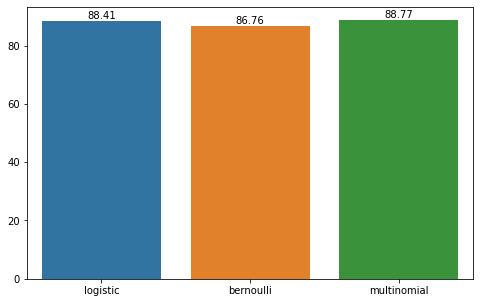

In [50]:
plt.figure(figsize=(8,5))
ax = sns.barplot(['logistic','bernoulli','multinomial'],scores)
ax.bar_label(ax.containers[0])

array([[4338,  641],
       [ 518, 4503]], dtype=int64)

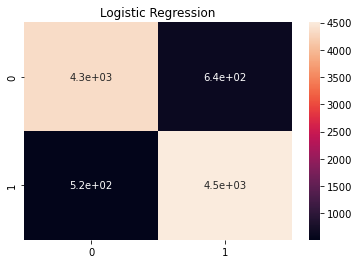

In [54]:
y_pred1 = lr.predict(X_test) 
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)
plt.title('Logistic Regression')
confusion_matrix(y_test,y_pred1)

array([[4649,  330],
       [ 994, 4027]], dtype=int64)

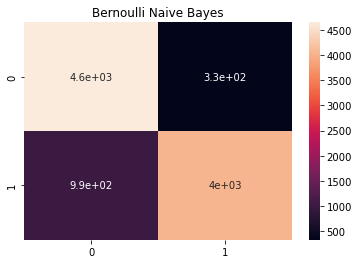

In [55]:
y_pred2 = bnb.predict(X_test) 
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title('Bernoulli Naive Bayes')
confusion_matrix(y_test,y_pred2)

array([[4445,  534],
       [ 589, 4432]], dtype=int64)

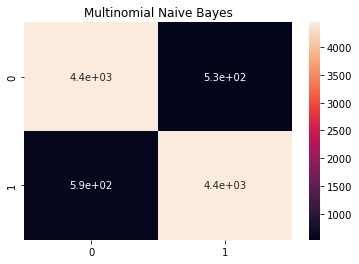

In [56]:
y_pred3 = mnb.predict(X_test) 
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True)
plt.title('Multinomial Naive Bayes')
confusion_matrix(y_test,y_pred3)